In [98]:
import pandas as pd
import numpy as np
import seaborn as sn
from scipy.spatial.distance import euclidean,cosine,pdist,squareform
from IPython.display import Image
from IPython.core.display import Image, display
import matplotlib.pyplot as plt
import pickle

In [3]:
oxfords_db = 'trial_full_data.csv'
oxfords_features = 'data_features.csv'
boots_db = 'trial_boots_full_data.csv'
boots_features = 'boots_data_features.csv'


In [101]:
oxfords_db = 'oxfords_data_frame_no_features.csv'
oxfords_features = 'oxfords_data_features_fc1.csv'

In [102]:
odf = pd.read_csv(oxfords_db,index_col=0)

In [103]:
ox_feat = pd.read_csv(oxfords_features,index_col=0)

In [104]:
odf.head()

,brand,color,image_path,key,msrp,name,sale,subcategory,url,view,like_product_key_0,like_product_key_1,like_product_key_2,like_product_key_3
0,Naot,Gray/Black Leather,/Users/bechtel/Work/Insight/shoezam/zap_scrap/...,oxfords_product_8711789_color_628501,$239.95,Magnate - Hand Crafted,NaN,Oxfords,https://www.zappos.com/p/naot-magnate-hand-cra...,pair,oxfords_product_8970707_color_4762,oxfords_product_9101487_color_3,oxfords_product_8520268_color_72,oxfords_product_8858436_color_3
1,Naot,Gray/Black Leather,/Users/bechtel/Work/Insight/shoezam/zap_scrap/...,oxfords_product_8711789_color_628501,$239.95,Magnate - Hand Crafted,NaN,Oxfords,https://www.zappos.com/p/naot-magnate-hand-cra...,top,oxfords_product_8970707_color_4762,oxfords_product_9101487_color_3,oxfords_product_8520268_color_72,oxfords_product_8858436_color_3
2,Naot,Gray/Black Leather,/Users/bechtel/Work/Insight/shoezam/zap_scrap/...,oxfords_product_8711789_color_628501,$239.95,Magnate - Hand Crafted,NaN,Oxfords,https://www.zappos.com/p/naot-magnate-hand-cra...,left,oxfords_product_8970707_color_4762,oxfords_product_9101487_color_3,oxfords_product_8520268_color_72,oxfords_product_8858436_color_3
3,Naot,Gray/Black Leather,/Users/bechtel/Work/Insight/shoezam/zap_scrap/...,oxfords_product_8711789_color_628501,$239.95,Magnate - Hand Crafted,NaN,Oxfords,https://www.zappos.com/p/naot-magnate-hand-cra...,right,oxfords_product_8970707_color_4762,oxfords_product_9101487_color_3,oxfords_product_8520268_color_72,oxfords_product_8858436_color_3
4,OluKai,Rum/Mustard,/Users/bechtel/Work/Insight/shoezam/zap_scrap/...,oxfords_product_8533189_color_559358,$184.95,Walino,NaN,Oxfords,https://www.zappos.com/p/olukai-walino-rum-mus...,pair,oxfords_product_8990179_color_1083,oxfords_product_9046923_color_23562,oxfords_product_9079416_color_261,oxfords_product_9028088_color_242953


In [100]:
#odf.iloc[:,:14].head()

In [105]:
#odf.msrp = odf.msrp.astype(float)
odf.msrp = odf.msrp.replace('[\$,]', '', regex=True).astype(float)

In [106]:
odf.sale = odf.sale.replace('[\$,]', '', regex=True).astype(float)

/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


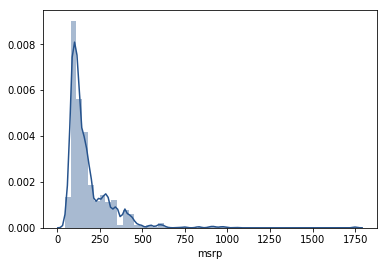

In [107]:
sn.distplot(odf['msrp'])

In [108]:
sale_with_nans=odf['sale']
sale_no_nans=sale_with_nans[~np.isnan(sale_with_nans)] # Remove the NaNs

/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


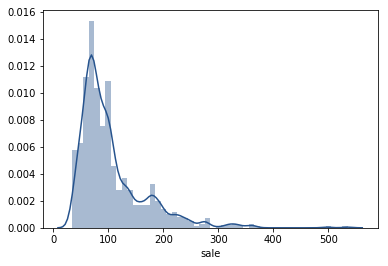

In [109]:
sn.distplot(sale_no_nans)

In [175]:
top_n = 5
sn.countplot(odf.groupby('key')['brand'],order=odf['brand'].value_counts().iloc[:top_n].index)

TypeError: 'SeriesGroupBy' object is not callable

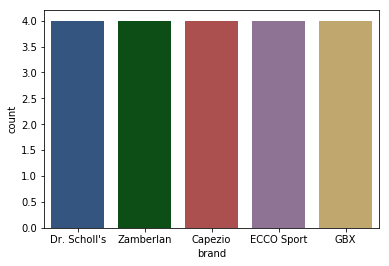

In [111]:
last_n = 5
sn.countplot(odf['brand'],order=odf.brand.value_counts().iloc[-last_n:].index)

In [112]:
oxf = ox_feat.values

In [113]:
oxf.shape

(7680, 4096)

In [114]:
all_zero_columns = np.where(~oxf.any(axis=0))[0]
non_zero_columns = np.where(oxf.any(axis=0))[0]
oxf_nonzero = oxf[:,~non_zero_columns]
len(non_zero_columns)
oxf_nonzero.shape

(7680, 3941)

In [115]:
l2 = np.zeros((oxf_nonzero.shape[0],oxf_nonzero.shape[0]))
cos = np.zeros((oxf_nonzero.shape[0],oxf_nonzero.shape[0]))

In [116]:
oxf_eu = pdist(oxf, 'euclidean')
G_eu = squareform(oxf_eu)
oxf_cos = pdist(oxf,'cosine')
G_cos = squareform(oxf_cos)

In [154]:
np.savetxt("oxfords_fc1_G_eu.csv", G_eu, delimiter=",")
np.savetxt("oxfords_fc1_G_cos.csv", G_cos, delimiter=",")

In [101]:
oxf_seu = pdist(oxf,'seuclidean')
G_seu = squareform(oxf_seu)

In [176]:
def print_n_similar_shoes(image_index,n,dataframe,G):
    PATH = dataframe['image_path'].iloc[image_index]
    similar_eu_dist = np.argsort(G[image_index,:])
    
    print('Original Image')
    #print('path: {}'.format(PATH))
    PATH = dataframe['image_path'].iloc[similar_eu_dist[0]]
    display(Image(filename = PATH, width=100, height=100))
    for i in range(1,n+1):
        sim1_PATH = dataframe['image_path'].iloc[similar_eu_dist[i]]
        print('Similar Shoe: #{}'.format(i))
        #print('path: {}'.format(PATH))
        display(Image(filename = sim1_PATH, width=100, height=100))

In [177]:
oxf[5,:]

array([0.  , 0.  , 0.  , ..., 1.63, 0.  , 1.82])

Original Image


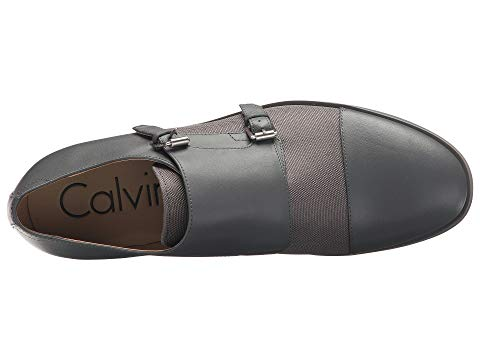

Similar Shoe: #1


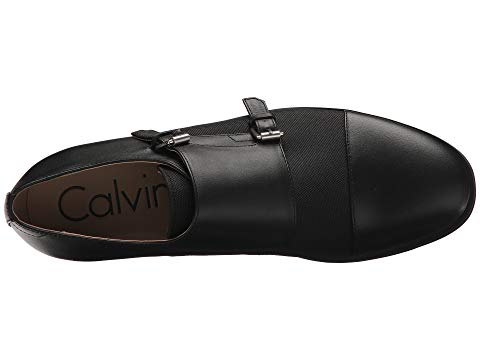

Similar Shoe: #2


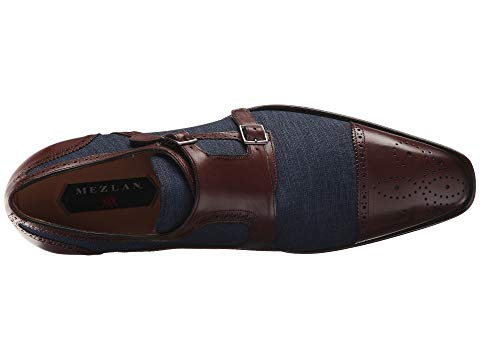

Similar Shoe: #3


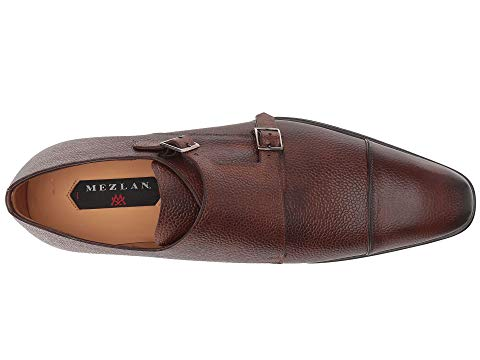

Similar Shoe: #4


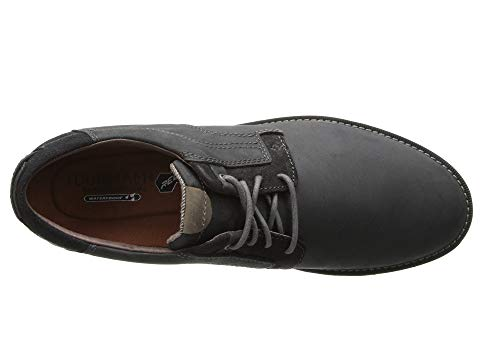

Similar Shoe: #5


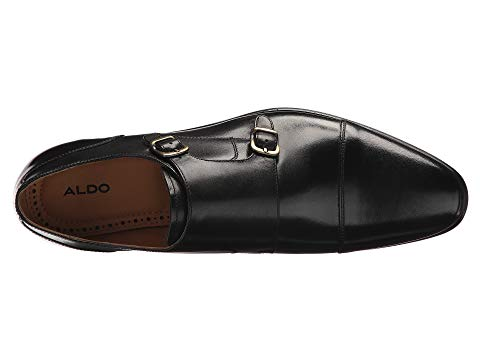

Similar Shoe: #6


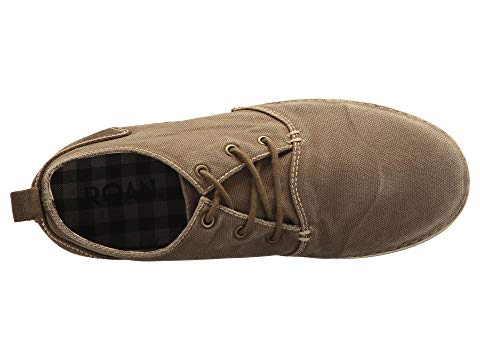

Similar Shoe: #7


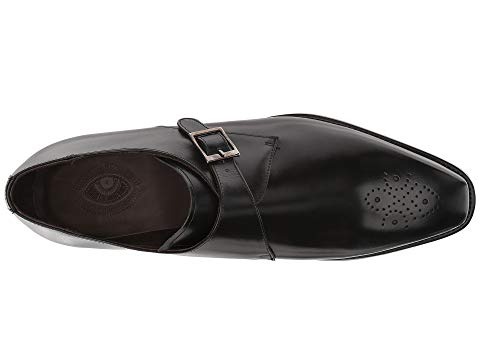

Similar Shoe: #8


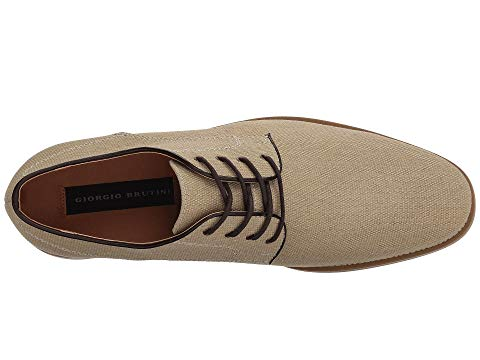

Similar Shoe: #9


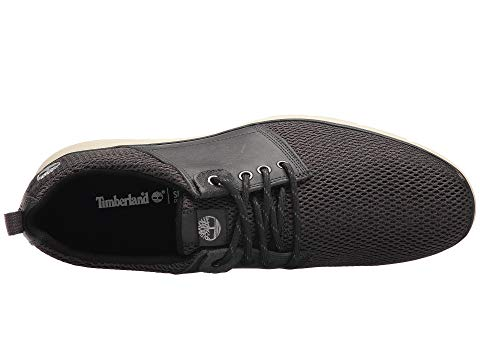

Similar Shoe: #10


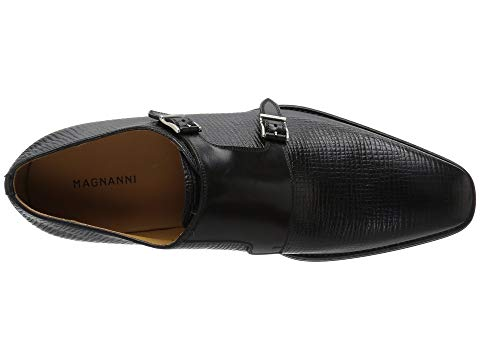

In [186]:
print_n_similar_shoes(7001,10,odf,G_eu)

Original Image


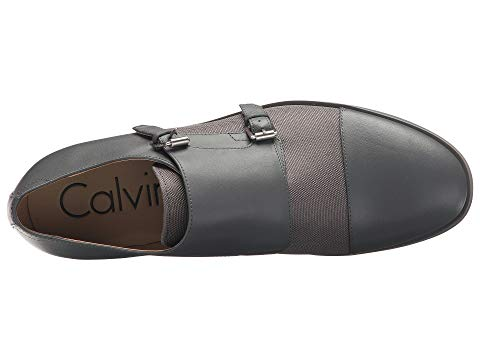

Similar Shoe: #1


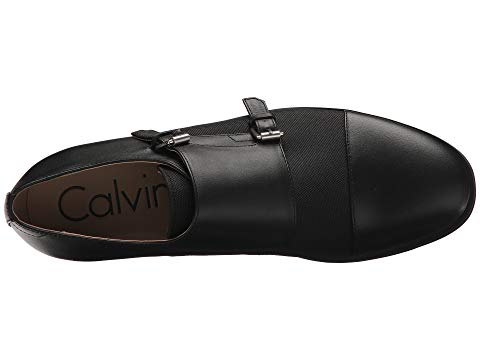

Similar Shoe: #2


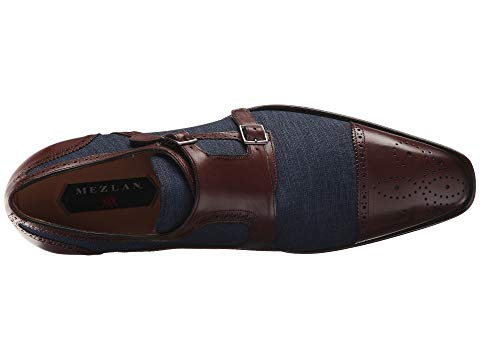

Similar Shoe: #3


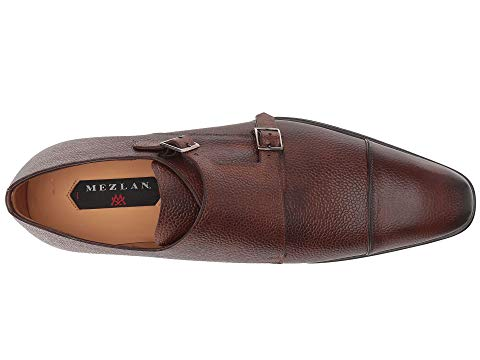

Similar Shoe: #4


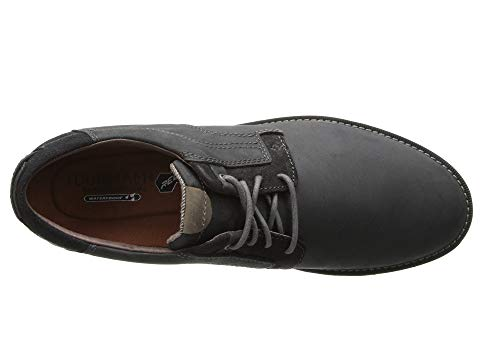

In [148]:
print_similar_shoes(7001,odf,G_cos)

In [21]:
# lets build simple example for first n shoes.
def build_classifer_dataset(num_shoes,odf,oxf):
    feature_vecs = []
    labels = []
    num_shoes = num_shoes*4
    for i in range(num_shoes):
        diff_vecs = abs(oxf[i,:]-oxf[i:num_shoes,:] )
        #print(diff_vecs.shape)
        feature_vecs.append(diff_vecs)
        #ys = np.zeros((num_shoes,1))
        #for row in range(num_shoes):
        #key_match_mask = odf['key'].iloc[:num_shoes].isin(odf['key'].iloc[i])
        label_mask = odf[['key','like_product_key_0','like_product_key_1','like_product_key_2','like_product_key_3']].iloc[i:num_shoes].isin([odf['key'].iloc[i],odf['like_product_key_0'].iloc[i],odf['like_product_key_1'].iloc[i],odf['like_product_key_2'].iloc[i],odf['like_product_key_3'].iloc[i]])
        matches = label_mask.any(axis=1)
        #print(label_mask)
            
        #print(matches.values)
        ys = 1*matches.values
        #print(ys)
        #print(feature_vecs)
        labels.append(ys) 
        #return 0
    labels = np.concatenate(labels,axis=0)
    farray = np.concatenate(feature_vecs,axis=0) 
    # total feature vecs is number of pairs [(d*(d-1))/2 + number of shoes ] since we include the (vec1-vec1) etc.
    return farray,labels
            

In [22]:
num_shoes = 30
farray, labels = build_classifer_dataset(num_shoes,odf,oxf)
print('farray.shape: {}'.format(farray.shape))
print('labels.shape: {}'.format(labels.shape))
print('number of matches: {}'.format(labels.sum()))

farray.shape: (7260, 4096)
labels.shape: (7260,)
number of matches: 364


In [23]:
from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test = \
    train_test_split(farray,labels,
                     test_size=0.2,stratify=labels)
print(len(data_train),' samples in training data\n',
      len(data_test),' samples in test data\n', )

5808  samples in training data
 1452  samples in test data



In [89]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier

dict_classifiers = {
    "Logistic Regression": 
            {'classifier': LogisticRegression(),
                'params' : [
                            {
                             'penalty': ['l1','l2'],
                             'C': [0.001,0.01,0.1,1,10,100,1000] #'C': [0.001,0.01,0.1,1,10,100,1000]
                            }
                           ]
            },
    "Nearest Neighbors": 
            {'classifier': KNeighborsClassifier(),
                 'params': [
                            {
                            'n_neighbors': [1, 3, 5, 10],
                            'leaf_size': [3, 30]
                            }
                           ]
            },
             
    "Linear SVM": 
            {'classifier': SVC(),
                 'params': [
                            {
                             'C': [1, 10, 100, 1000],
                             'gamma': [0.001, 0.0001],
                             'kernel': ['linear']
                            }
                           ]
            },
    "Gradient Boosting Classifier": 
            {'classifier': GradientBoostingClassifier(),
                 'params': [
                            {
                             #'learning_rate': [0.05, 0.1],
                             'n_estimators' :[1000] #[50, 100, 200],
                             #'max_depth':[3,None]
                            }
                           ]
            },
    "Decision Tree":
            {'classifier': tree.DecisionTreeClassifier(),
                 'params': [
                            {
                             'max_depth':[3,None]
                            }
                             ]
            },
    "Random Forest": 
            {'classifier': RandomForestClassifier(),
                 'params': [
                     {#'max_features' : 'auto',
                         #'bootstrap': [True, False],
                     #'max_depth': [5, None],
                     #'max_features': ['auto', 'sqrt'],
                     #'min_samples_leaf': [1, 2, 4],
                     #'min_samples_split': [2, 5, 10],
                     'n_estimators': [1000]} # 'n_estimators': [50, 100, 200]}
                 ]

            },
    "Naive Bayes": 
            {'classifier': GaussianNB(),
                 'params': {}
            }
}
dict_classifiers = {
    "Logistic Regression": 
            {'classifier': LogisticRegression(),
                'params' : [
                            {
                             'penalty': ['l1','l2'],
                             #'C': [0.001,0.01,0.1,1,10,100,1000] #'C': [0.001,0.01,0.1,1,10,100,1000]
                            }
                           ]
            },
}

In [31]:
from sklearn.model_selection import learning_curve 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.6, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [32]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix




def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [33]:
import time
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score

num_classifiers = len(dict_classifiers.keys())

def batch_classify(dict_classifiers,X_train, Y_train, X_test, Y_test, verbose = True):
    df_results = pd.DataFrame(
        data=np.zeros(shape=(num_classifiers,4)),
        columns = ['classifier',
                   'train_score', 
                   'test_score',
                   'training_time'])
    count = 0
    all_estimators = []
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        grid = GridSearchCV(classifier['classifier'], 
                      classifier['params'],
                      refit=True,
                        cv = 5, # 9+1 maybe 10
                        scoring = 'recall', # scoring metric /  'accuracy' recall',#scoring = 
                        n_jobs = -1
                        )
        estimator = grid.fit(X_train,
                             Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = estimator.score(X_train,
                                      Y_train)
        test_score = estimator.score(X_test,
                                     Y_test)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key,
                                                    f=t_diff))
        count+=1
        """plot_learning_curve(estimator, 
                              "{}".format(key),
                              X_train,
                              Y_train,
                              ylim=(0.75,1.0),
                              cv=10)"""
        

        # Compute confusion matrix
        cnf_matrix = confusion_matrix(Y_test, estimator.predict(X_test))
        np.set_printoptions(precision=2)

        # Plot non-normalized confusion matrix
        """plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=class_names,
                              title='Confusion matrix, without normalization')"""

        # Plot normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['non-match','match'], normalize=True,
                              title='Normalized confusion matrix')

        plt.show()
        all_estimators.append(estimator)
        
    return df_results,all_estimators

trained Logistic Regression in 10.31 s
Normalized confusion matrix
[[0.99 0.01]
 [0.55 0.45]]


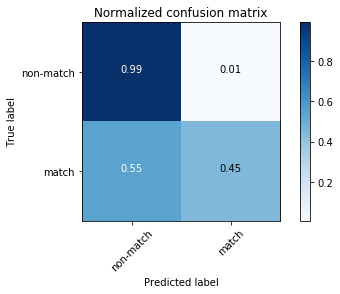

,classifier,train_score,test_score,training_time
0,Logistic Regression,1.0,0.452055,10.309291


In [90]:
df_results,all_estimators = batch_classify(dict_classifiers,data_train, label_train, data_test, label_test)
display(df_results.sort_values(by='test_score', ascending=False))
model = all_estimators[0]

In [91]:
def compute_and_plot_confusion_matrix(estimator,X,Y):
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(Y, estimator.predict(X))
        np.set_printoptions(precision=2)

        # Plot non-normalized confusion matrix
        """plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=class_names,
                              title='Confusion matrix, without normalization')"""

        # Plot normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['non-match','match'], normalize=True,
                              title='Normalized confusion matrix')

Normalized confusion matrix
[[1.   0.  ]
 [0.11 0.89]]


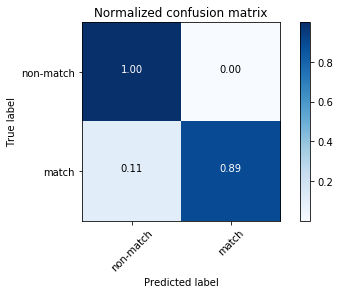

In [92]:
compute_and_plot_confusion_matrix(model,farray,labels)

Normalized confusion matrix
[[0.99 0.01]
 [0.55 0.45]]


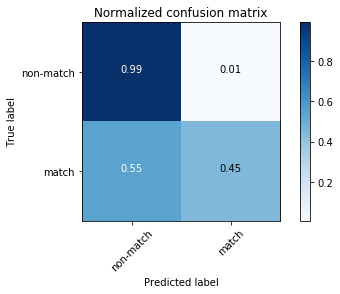

In [93]:
compute_and_plot_confusion_matrix(model,data_test,label_test)

Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


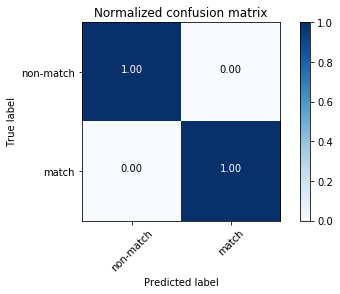

In [94]:
compute_and_plot_confusion_matrix(model,data_train,label_train)

In [180]:
labels[np.where((labels - lr.predict(farray))==-1)]

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [86]:
sum(label_train) / data_train.shape[0]

0.07175925925925926

In [87]:
sum(label_test) / data_test.shape[0]

0.07098765432098765

In [88]:
lr = all_estimators[0]

In [89]:
lr.classes_

array([0, 1])

In [265]:
np.set_printoptions(precision=4,suppress=True)
lr.predict_proba(farray[0:2,:])

array([[0.0092, 0.9908],
       [0.    , 1.    ]])

In [266]:
match_props = lr.predict_proba(farray)

In [46]:
def print_shoe_by_index(image_index,dataframe):
    PATH = dataframe['image_path'].iloc[image_index]
    display(Image(filename = PATH, width=100, height=100))

In [59]:
def get_farray_and_label_chunk(farray,total_prod_number,input_image_index,labels):
    # need to get the rows in farray correponding to the 
    # differenc vectors between input_image_index_ and the rest of the 
    # vecs. 
    ordered_diff_vecs = []
    ordered_labels = []
    start = 0
    for i in range(total_prod_number):
        end = start + total_prod_number - i
        diff_vecs = farray[start:end,:] 
        diff_labels = labels[start:end] 
        if input_image_index > i:
            pair_vec = diff_vecs[input_image_index - i,:][None,:]
            #print("pair_vec.shape: {}".format(pair_vec.shape))
            ordered_diff_vecs.append(pair_vec)
            pair_label = [diff_labels[input_image_index - i]]
            if pair_label==[1]:
                print("found_match")
            ordered_labels.extend(pair_label)
        elif input_image_index==i:
            ordered_diff_vecs.append(diff_vecs)
            ordered_labels.extend(diff_labels)
            break
        else:
            print("Error somethings gone wrong")
        start = end
    
    #labels = np.concatenate(labels,axis=0)
    farray_chunk = np.concatenate(ordered_diff_vecs,axis=0) # farray should have shape (total_prod_number,n_features)
    print("farray_chunk.shape {}".format(farray_chunk.shape))
    label_chunk = np.array(ordered_labels)#np.concatenate(ordered_labels,axis=0) # 
    print("label_chunk.shape {}".format(label_chunk.shape))
    return farray_chunk,label_chunk
        

In [60]:
def print_one_of_each_included_shoe(total_prod_number,odf):
     
    for i in range(0,total_prod_number,4):
        print_shoe_by_index(i,odf)

In [61]:
def get_top_n_predictions(num_desired_matches,input_image_index, farray, total_prod_number,model,odf,labels):
    np.set_printoptions(precision=4,suppress=True)
    farray_chunk,label_chunk = get_farray_and_label_chunk(farray,total_prod_number,input_image_index,labels)
    #print(farray_chunk.shape)
    print("Real Labels: {}".format(label_chunk))
    print("Predicted Labels: {}".format(model.predict(farray_chunk)))
    match_probs = model.predict_proba(farray_chunk)[:,1]
    best_args = np.argsort(match_probs)[::-1][:num_desired_matches]
    print('Original Image')
    print_shoe_by_index(input_image_index,odf)
    for shoenum, index in enumerate(best_args):
        print('Shoe #{} Probability of Match: {}'.format(shoenum,match_probs[index]))
        print_shoe_by_index(index,odf)
        

found_match
found_match
found_match
farray_chunk.shape (120, 4096)
label_chunk.shape (120,)
Real Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1]
Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1]
Original Image


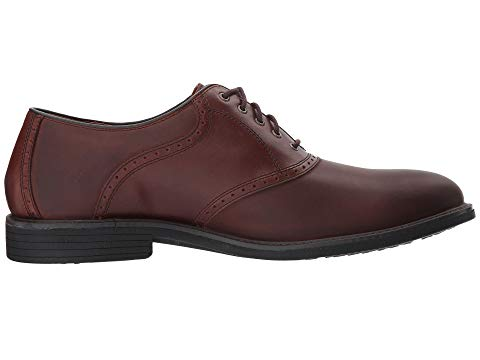

Shoe #0 Probability of Match: 1.0


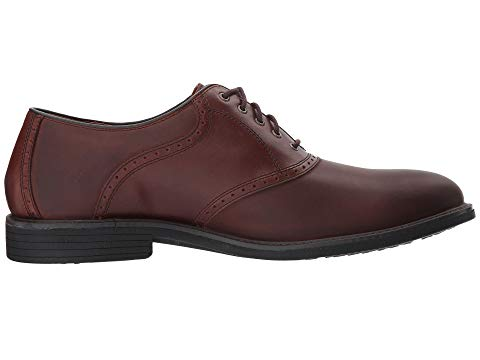

Shoe #1 Probability of Match: 0.675


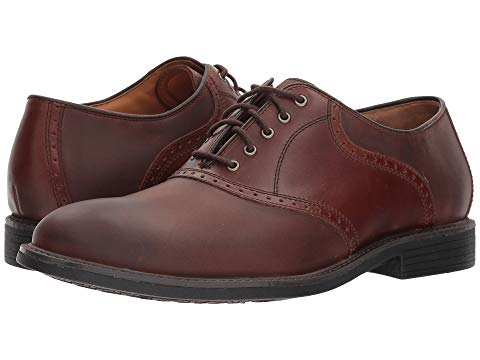

Shoe #2 Probability of Match: 0.659


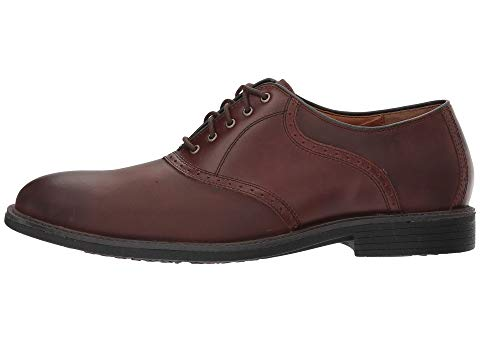

Shoe #3 Probability of Match: 0.647


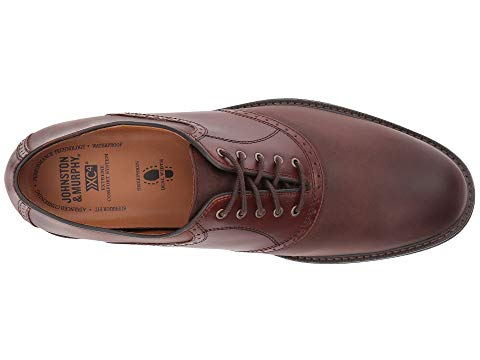

Shoe #4 Probability of Match: 0.088


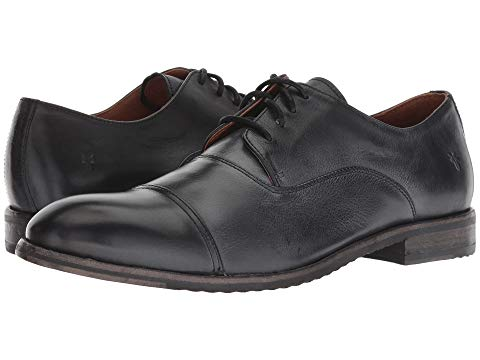

Shoe #5 Probability of Match: 0.064


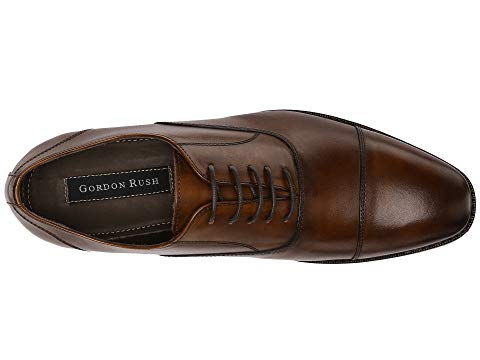

Shoe #6 Probability of Match: 0.061


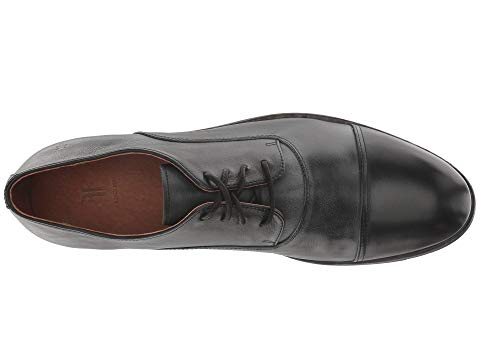

Shoe #7 Probability of Match: 0.032


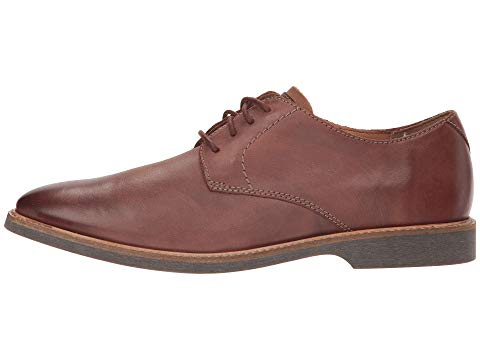

Shoe #8 Probability of Match: 0.029


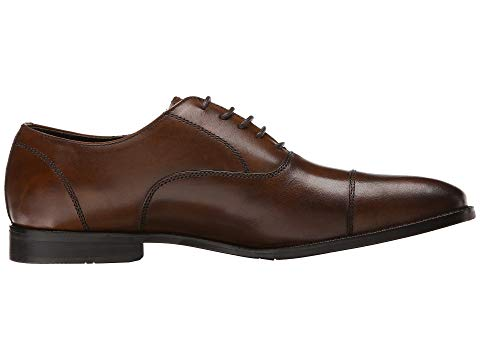

Shoe #9 Probability of Match: 0.028


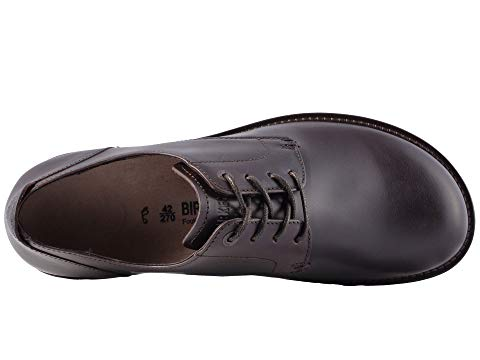

In [64]:
get_top_n_predictions(10,119,farray,num_shoes*4,model,odf,labels)

In [74]:
def predict_shoe(top_n, input_image_index,oxf,model,odf):    
    np.set_printoptions(precision=4,suppress=True)
    diff_vecs = abs(oxf[input_image_index,:]-oxf)
    
    match_probs = model.predict_proba(diff_vecs)[:,1]
    best_args = np.argsort(match_probs)[::-1][:top_n]
    print('Original Image')
    print_shoe_by_index(input_image_index,odf)
    for shoenum, index in enumerate(best_args):
        print('Shoe #{} Probability of Match: {}'.format(shoenum,match_probs[index]))
        print_shoe_by_index(index,odf)

Original Image


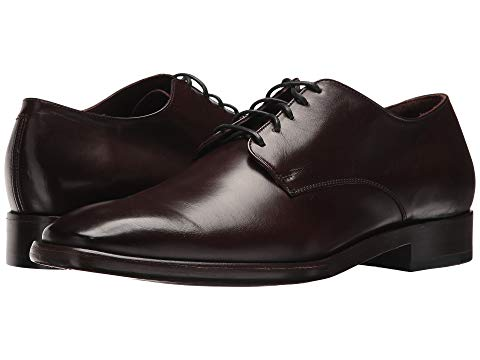

Shoe #0 Probability of Match: 1.0


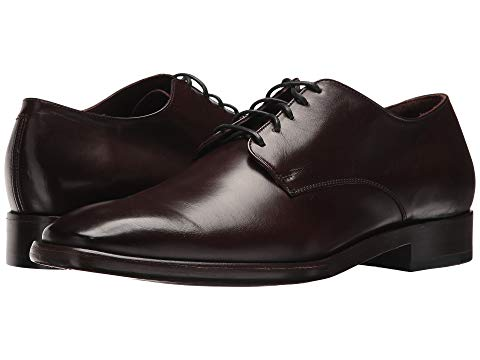

Shoe #1 Probability of Match: 0.17


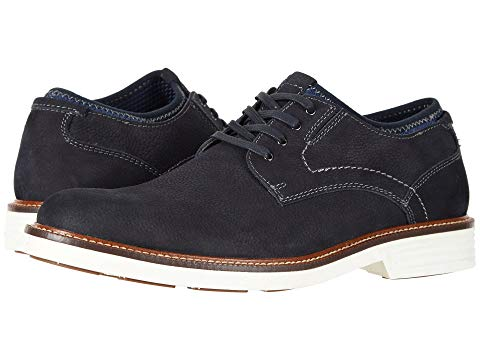

Shoe #2 Probability of Match: 0.169


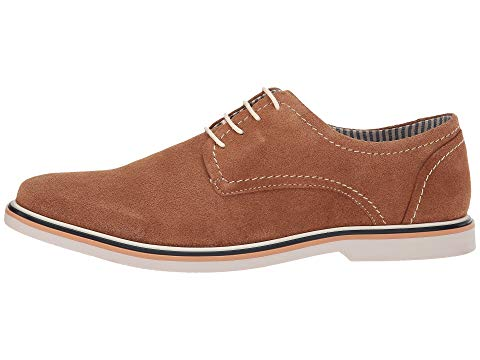

Shoe #3 Probability of Match: 0.167


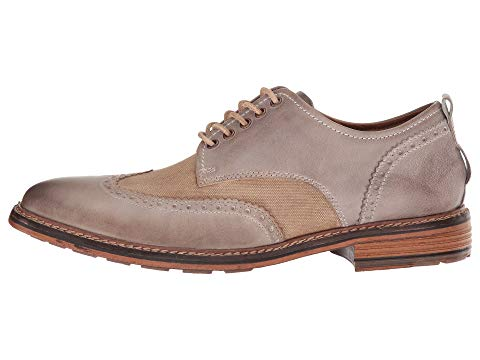

Shoe #4 Probability of Match: 0.166


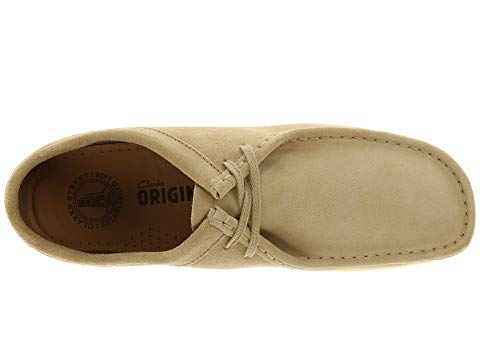

Shoe #5 Probability of Match: 0.157


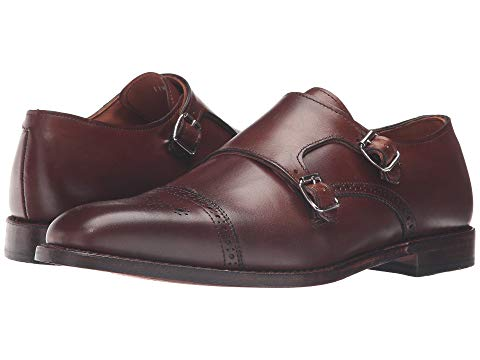

Shoe #6 Probability of Match: 0.156


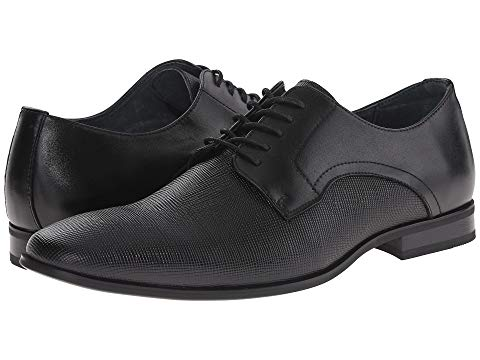

Shoe #7 Probability of Match: 0.155


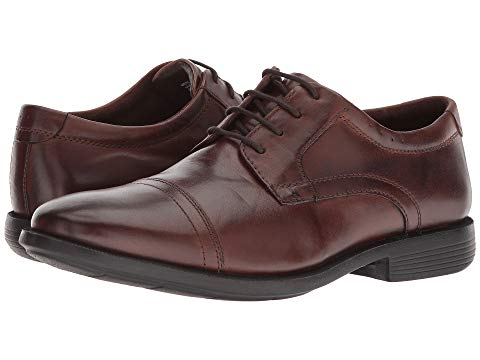

Shoe #8 Probability of Match: 0.148


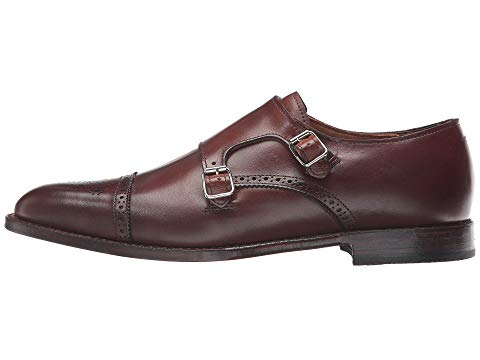

Shoe #9 Probability of Match: 0.145


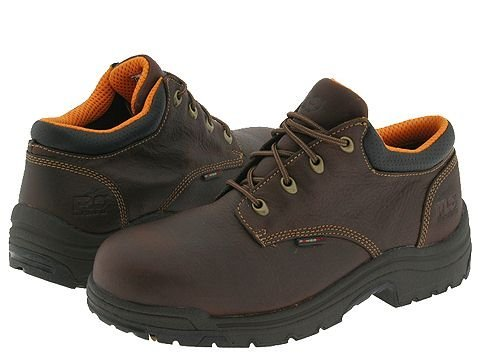

In [81]:
predict_shoe(10,4200,oxf,model,odf)
    

In [42]:
print_one_of_each_included_shoe(num_shoes*4,odf)

NameError: name 'print_one_of_each_included_shoe' is not defined

In [103]:
num_shoes

20

In [96]:
def save_model(model,save_path):# save the model to disk
    with open(save_path,'wb') as f:
        pickle.dump(model, f)

    # some time later...

    # load the model from disk
    #loaded_model = pickle.load(open(filename, 'rb'))
    #result = loaded_model.score(X_test, Y_test)
    #print(result)

In [99]:
save_model(model,'test_model.pkl')